# Metodos de ensamble

# Bagging - Boosting

## Lectura data informacion

In [13]:
# Se toma el data set wine para hacer prediccion de las clases Alcohol y Hue
import numpy as np
import pandas as pd
df_wine = pd.read_csv('wine.csv')
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash',
                   'Alcalinity of ash','Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine = df_wine[df_wine['Class label'] != 1] 
y = df_wine['Class label'].values 
X = df_wine[['Alcohol', 'Hue']].values

## Codificacion de clases y reparticion de la informacion

In [18]:
### Se codifican las clases en formato binario y se crea el insumo de entrenamiento 
### y prueba a tener en cuenta en la modelacion

from sklearn.preprocessing import LabelEncoder 
# from sklearn.cross_validation import train_test_split - Esta se encuentra deprecado, reemplaza la siguiente
from sklearn.model_selection import train_test_split
le = LabelEncoder() 
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.40,random_state=1)

# Pregunta: Que realiza la funcion LabelEncoder ?
#labelencoder:asigna codificacion numerica a CLASES, OneHot encoding asigna ceros y unos a predictores
#Categoricos

## Instanciando BaggingClassifier

In [19]:
### scikit-learn tiene implementado el algoritmo BaggingClassifier.
### Lo importamos desde el modulo ensemble. 

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

### utiliza arboles sin poda como el clasificador base y crear un ensamble a partir de el
### con 500 arboles entrenados con diferentes muestras extraidas de la base de datos de entrenamiento.
#Arboles sin poda: max_depth : None, no le asigno la profundidad


## Evaluando rendimientos de un arbol

In [21]:
from sklearn.metrics import accuracy_score 

# entrenar un arbol
mi_arbol_sin_poda = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth=None, 
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_features=None, random_state=None, max_leaf_nodes=None, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None,
                                    presort=False)


"""
class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, 
max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, 
warm_start=False, n_jobs=None, random_state=None, verbose=0)
"""

bag = BaggingClassifier(base_estimator = mi_arbol_sin_poda, n_estimators = 500, max_samples = 1.0, 
                        max_features = 1.0, bootstrap = True, bootstrap_features = False, 
                        n_jobs = 1, random_state = 1)


#tree = ...
#Para ENTRENAR: fit(self, X, y[, sample_weight, …])	Build a decision tree classifier from the training set (X, y).
#Para PREDECIR: predict(self, X[, check_input])	Predict class or regression value for X.
#Para predecir uso solo las X

# Realizar inferencia con el arbol
y_train_pred = mi_arbol_sin_poda.fit(X_train, y_train)
y_test_pred = mi_arbol_sin_poda.predict(X_test)

# Estimar el accuracy
#sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

"""
>>> from sklearn.metrics import accuracy_score
>>> y_pred = [0, 2, 1, 3]
>>> y_true = [0, 1, 2, 3]
>>> accuracy_score(y_true, y_pred)
0.5
>>> accuracy_score(y_true, y_pred, normalize=False)
2
"""
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

# Discusion: El arbol predice correctamente las clases de la base de datos de entrenamiento,
# sin embargo tiene dificultades con la base de entrenamiento de prueba.

TypeError: Expected sequence or array-like, got estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Evaluando rendimientos de un modelo ensamblado de arboles

In [14]:
# Entrenar un ensamble Bagging
bag = ...

# Realizar inferencia con el ensamble Bagging
y_train_pred = ...
y_test_pred = ...

# Estimar el accuracy
bag_train = ...
bag_test = ...

print('Bagging train/test accuracies %.3f/%.3f'
% (bag_train, bag_test))

# Pregunta: Que difieren estos rendimientos respecto a los del arbol ?

Bagging train/test accuracies 1.000/0.896


In [13]:
import numpy as np

x_min = X_train[:, 0].min() - 1 
x_max = X_train[:, 0].max() + 1 
y_min = X_train[:, 1].min() - 1 
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

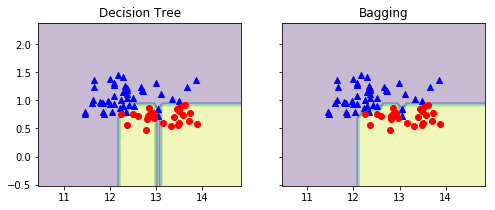

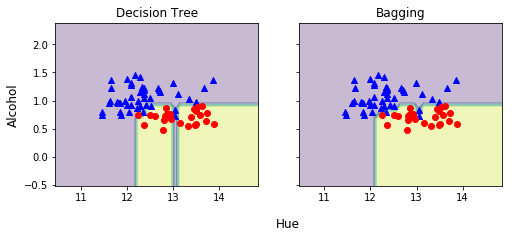

In [16]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8, 3))

for idx, clf, tt in zip([0, 1],[tree, bag],['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12) 
plt.text(10.2, -1.2,
         s='Hue',ha='center',
         va='center',
         fontsize=12) 
plt.show()

## Instanciando AdaBoost

## Evaluando rendimientos de un modelo ensamblado de arboles (AdaBoost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 

# Instanciar y entrenar un ensamble boosting ada
ada = ...

# Realizar inferencia con el ensamble boosting ada
y_train_pred = ...
y_test_pred = ...

# Estimar el accuracy
ada_train = ...
ada_test = ...

print('Boosting train/test accuracies %.3f/%.3f'
% (ada_train, ada_test))

# Pregunta: Que difieren estos rendimientos respecto a los del arbol ?

In [ ]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8, 3))

for idx, clf, tt in zip([0, 1],[tree, ada],['Decision Tree', 'AdaBoost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12) 
plt.text(10.2, -1.2,
         s='Hue',ha='center',
         va='center',
         fontsize=12) 
plt.show()